# <b><span style='color:#85BB65'>|</span> Car Price Prediction </b>

###Assigment

Your notebooks must contain the following steps:

1.  a. Perform data cleaning and pre-processing.
    b. What steps did you use in this process and how did you clean your data.
2.  a. Perform exploratory data analysis on the given dataset.
    b. Explain each and every graphs that you make.
3.  a. Train a ml-model and evaluate it using different metrics.
    b. Why did you choose that particular model? What was the accuracy?
    c. Hyperparameter optimization and feature selection is a plus.
4.  a. Model deployment and use of ml-flow is a plus.
    b. Perform model interpretation and show feature importance for your model.
    c. Provide some explanation for the above point.



**Created By: Andi Ahmad Haidir**

In [245]:
#import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import (
    KFold, cross_val_score, GridSearchCV)

#Set warnings to be ignored
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)

In [246]:
df = pd.read_csv("car_price_prediction.csv",
                 na_values={
                     'Levy': '-',
                     'Mileage': '0 km',
                     'Engine volume': ['0', '20']
                 })

In [247]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### <b><span style='color:#85BB65'>|</span> Data Cleaning and Data Preprocessing</b>

In [248]:
#Make column names into a format that is easy to process by pandas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.','')

In [249]:
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [250]:
df.price.max()

26307500

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19237 non-null  int64  
 1   price             19237 non-null  int64  
 2   levy              13418 non-null  float64
 3   manufacturer      19237 non-null  object 
 4   model             19237 non-null  object 
 5   prod_year         19237 non-null  int64  
 6   category          19237 non-null  object 
 7   leather_interior  19237 non-null  object 
 8   fuel_type         19237 non-null  object 
 9   engine_volume     19225 non-null  object 
 10  mileage           18516 non-null  object 
 11  cylinders         19237 non-null  float64
 12  gear_box_type     19237 non-null  object 
 13  drive_wheels      19237 non-null  object 
 14  doors             19237 non-null  object 
 15  wheel             19237 non-null  object 
 16  color             19237 non-null  object

In [252]:
#replace irrelevant data in certain columns
df['mileage'] = df['mileage'].str.replace(' km', '')
df['doors'] = df['doors'].replace({'04-May':'4','02-Mar':'2','>5':'5'})
df['engine_volume'] = df['engine_volume'].str.replace(' Turbo', '')
df['cylinders'] = df['cylinders'].astype('float32')

In [253]:
df.duplicated().sum()

313

In [254]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [255]:
df.isna().sum()

id                     0
price                  0
levy                5709
manufacturer           0
model                  0
prod_year              0
category               0
leather_interior       0
fuel_type              0
engine_volume         12
mileage              714
cylinders              0
gear_box_type          0
drive_wheels           0
doors                  0
wheel                  0
color                  0
airbags                0
dtype: int64

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18924 non-null  int64  
 1   price             18924 non-null  int64  
 2   levy              13215 non-null  float64
 3   manufacturer      18924 non-null  object 
 4   model             18924 non-null  object 
 5   prod_year         18924 non-null  int64  
 6   category          18924 non-null  object 
 7   leather_interior  18924 non-null  object 
 8   fuel_type         18924 non-null  object 
 9   engine_volume     18912 non-null  object 
 10  mileage           18210 non-null  object 
 11  cylinders         18924 non-null  float32
 12  gear_box_type     18924 non-null  object 
 13  drive_wheels      18924 non-null  object 
 14  doors             18924 non-null  object 
 15  wheel             18924 non-null  object 
 16  color             18924 non-null  object 
 17

In [257]:
import datetime
dt = datetime.datetime.now()
df['car_age'] = dt.year - df['prod_year']
df.drop('prod_year', axis=1, inplace=True)

In [258]:
df.describe()

,id,price,levy,cylinders,airbags,car_age
count,1.892400e+04,1.892400e+04,13215.000000,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,906.299205,4.580215,6.568379,13.085764
std,9.375468e+05,1.921356e+05,463.296871,1.200223,4.322323,5.665749
min,2.074688e+07,1.000000e+00,87.000000,1.000000,0.000000,4.000000
25%,4.569501e+07,5.331000e+03,640.000000,4.000000,4.000000,9.000000
50%,4.577191e+07,1.317200e+04,781.000000,4.000000,6.000000,12.000000
75%,4.580174e+07,2.206300e+04,1058.000000,4.000000,12.000000,15.000000
max,4.581665e+07,2.630750e+07,11714.000000,16.000000,16.000000,85.000000


In [259]:
#change the data type not object to relevant data type
columns_to_convert = ['price', 'levy', 'engine_volume', 'mileage', 'airbags', 'car_age']

for column in columns_to_convert:
    df[column] = df[column].astype('float64')

In [260]:
#drop unreasonable price (skipped)
# df = df.drop(df[(df['price'] <= 1000) | (df['engine_volume'] < 1) | (df['cylinders'] < 2) ].index, axis=0).reset_index(drop=True)

In [261]:
df.describe()

,id,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,1.892400e+04,1.892400e+04,13215.000000,18912.000000,1.821000e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,906.299205,2.305600,1.616358e+06,4.580215,6.568379,13.085764
std,9.375468e+05,1.921356e+05,463.296871,0.857165,4.974882e+07,1.200223,4.322323,5.665749
min,2.074688e+07,1.000000e+00,87.000000,0.100000,1.300000e+01,1.000000,0.000000,4.000000
25%,4.569501e+07,5.331000e+03,640.000000,1.800000,7.700000e+04,4.000000,4.000000,9.000000
50%,4.577191e+07,1.317200e+04,781.000000,2.000000,1.300000e+05,4.000000,6.000000,12.000000
75%,4.580174e+07,2.206300e+04,1058.000000,2.500000,1.913730e+05,4.000000,12.000000,15.000000
max,4.581665e+07,2.630750e+07,11714.000000,7.300000,2.147484e+09,16.000000,16.000000,85.000000


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18924 non-null  int64  
 1   price             18924 non-null  float64
 2   levy              13215 non-null  float64
 3   manufacturer      18924 non-null  object 
 4   model             18924 non-null  object 
 5   category          18924 non-null  object 
 6   leather_interior  18924 non-null  object 
 7   fuel_type         18924 non-null  object 
 8   engine_volume     18912 non-null  float64
 9   mileage           18210 non-null  float64
 10  cylinders         18924 non-null  float32
 11  gear_box_type     18924 non-null  object 
 12  drive_wheels      18924 non-null  object 
 13  doors             18924 non-null  object 
 14  wheel             18924 non-null  object 
 15  color             18924 non-null  object 
 16  airbags           18924 non-null  float64
 17

In [263]:
df_numeric = df.select_dtypes(include='float64')

for col in df_numeric.columns:
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    outliers = ((df_numeric[col] > high) | (df_numeric[col] < low)).sum()
    total = df_numeric.shape[0]
    print(f"Total outliers in {col} are: {outliers} - {round(100 * (outliers / total), 2)}%")

    if outliers > 0:
        df = df.loc[(df[col] <= high) & (df[col] >= low)]

Total outliers in price are: 1055 - 5.57%
Total outliers in levy are: 680 - 3.59%
Total outliers in engine_volume are: 1346 - 7.11%
Total outliers in mileage are: 665 - 3.51%
Total outliers in airbags are: 0 - 0.0%
Total outliers in car_age are: 962 - 5.08%


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10606 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10606 non-null  int64  
 1   price             10606 non-null  float64
 2   levy              10606 non-null  float64
 3   manufacturer      10606 non-null  object 
 4   model             10606 non-null  object 
 5   category          10606 non-null  object 
 6   leather_interior  10606 non-null  object 
 7   fuel_type         10606 non-null  object 
 8   engine_volume     10606 non-null  float64
 9   mileage           10606 non-null  float64
 10  cylinders         10606 non-null  float32
 11  gear_box_type     10606 non-null  object 
 12  drive_wheels      10606 non-null  object 
 13  doors             10606 non-null  object 
 14  wheel             10606 non-null  object 
 15  color             10606 non-null  object 
 16  airbags           10606 non-null  float64
 17

In [265]:
df.describe()

,id,price,levy,engine_volume,mileage,cylinders,airbags,car_age
count,1.060600e+04,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000
mean,4.566366e+07,14995.125306,806.550632,2.133396,127979.569112,4.279841,6.967754,10.880445
std,4.889941e+05,11973.596464,268.328606,0.581670,73758.186108,0.743948,4.351711,2.696644
min,3.175700e+07,1.000000,247.000000,0.800000,13.000000,1.000000,0.000000,4.000000
25%,4.572037e+07,4234.000000,639.000000,1.700000,72000.000000,4.000000,4.000000,9.000000
50%,4.577190e+07,13799.000000,769.000000,2.000000,118400.000000,4.000000,6.000000,11.000000
75%,4.580311e+07,21796.000000,966.000000,2.500000,170000.000000,4.000000,12.000000,13.000000
max,4.581665e+07,47120.000000,1681.000000,3.500000,362868.000000,16.000000,16.000000,24.000000


In [266]:
df.describe(include=object)

,manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,doors,wheel,color
count,10606,10606,10606,10606,10606,10606,10606,10606,10606,10606
unique,43,615,10,2,6,4,3,3,2,16
top,HYUNDAI,Elantra,Sedan,Yes,Petrol,Automatic,Front,4,Left wheel,Black
freq,2883,820,5243,8903,5122,8951,8432,10437,10382,2711


### <b><span style='color:#85BB65'>|</span> Exploratory Data Analysis</b>

#### Top Manufacturer

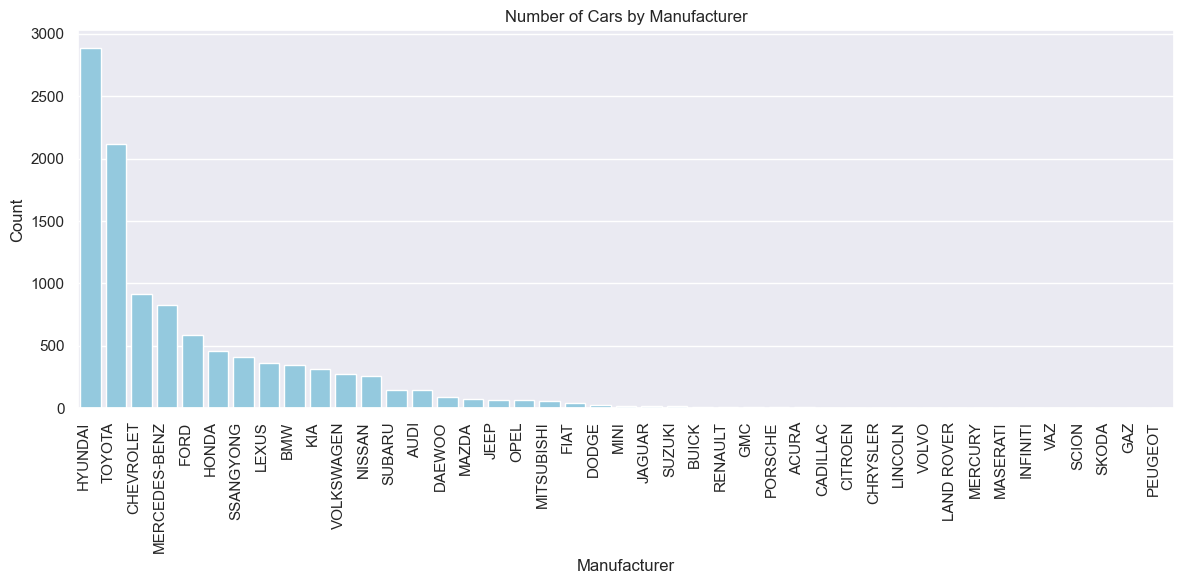

In [267]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

sns.countplot(data=df, x="manufacturer", order=df['manufacturer'].value_counts().index, color='skyblue')

plt.xticks(rotation=90, ha="right")
plt.title('Number of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This plot displays the number of entries by car manufacturer from most to least.

#### Top Cars Category

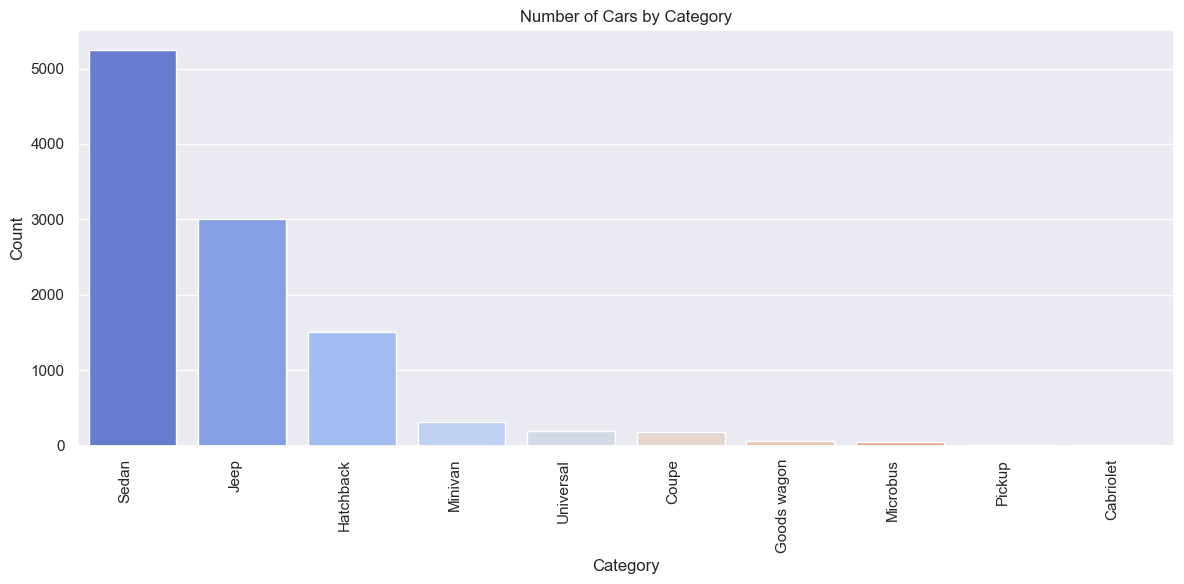

In [268]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

sns.countplot(data=df, x="category", order=df['category'].value_counts().index, palette='coolwarm')

plt.xticks(rotation=90, ha="right")
plt.title('Number of Cars by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Sedans dominate the highest sales, while microbuses have the lowest sales. This could be due to consumer preference for sedans, better fuel efficiency, and fashion trends.

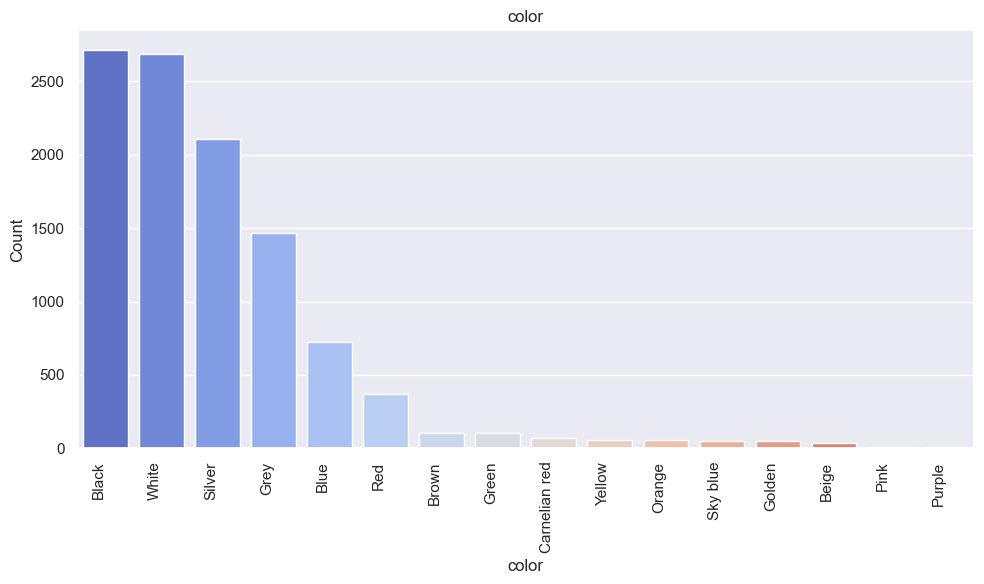

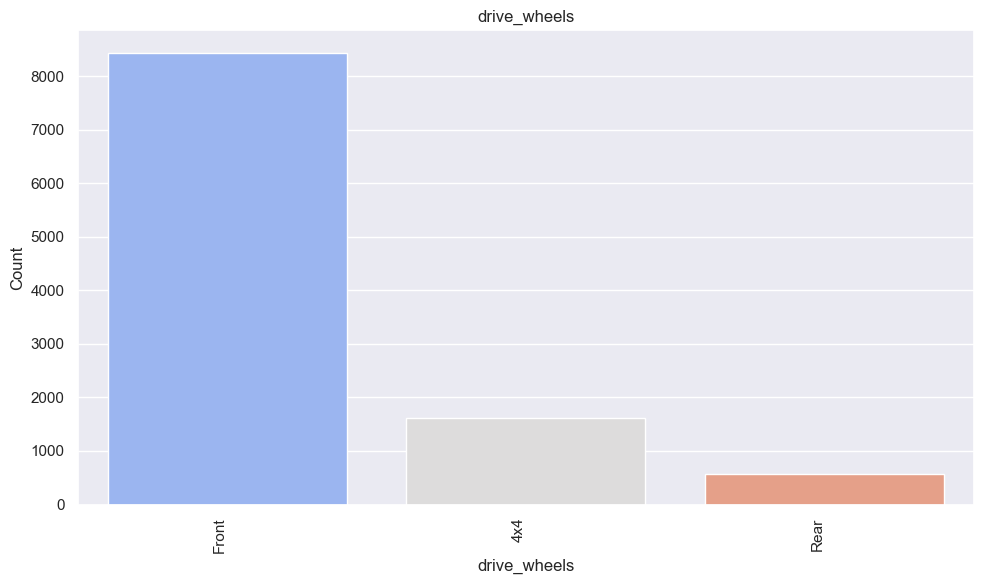

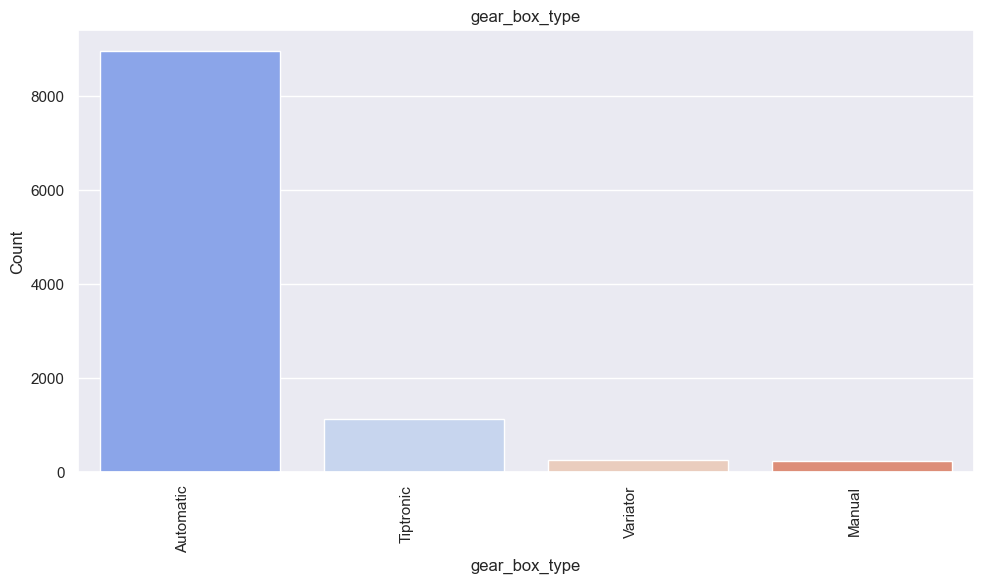

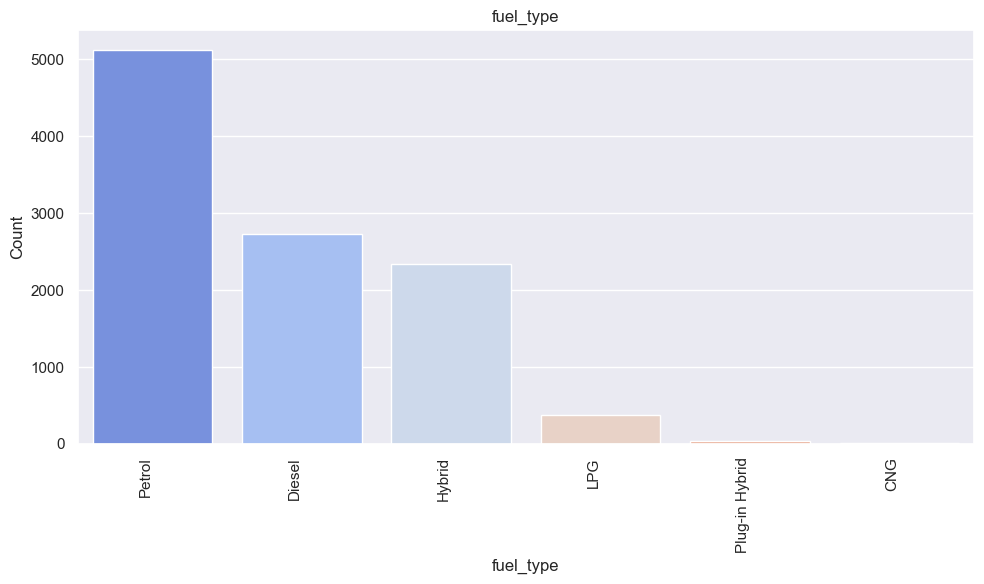

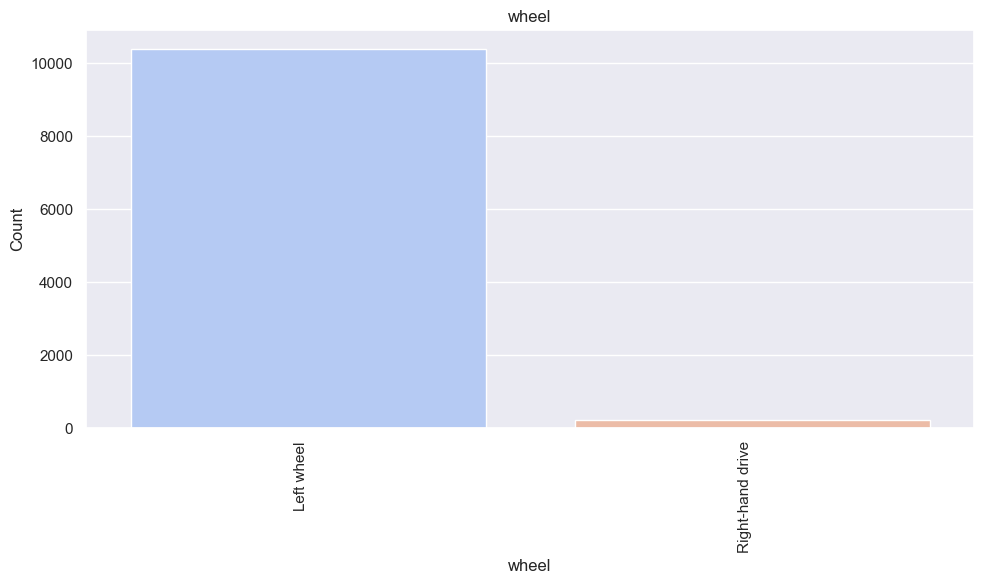

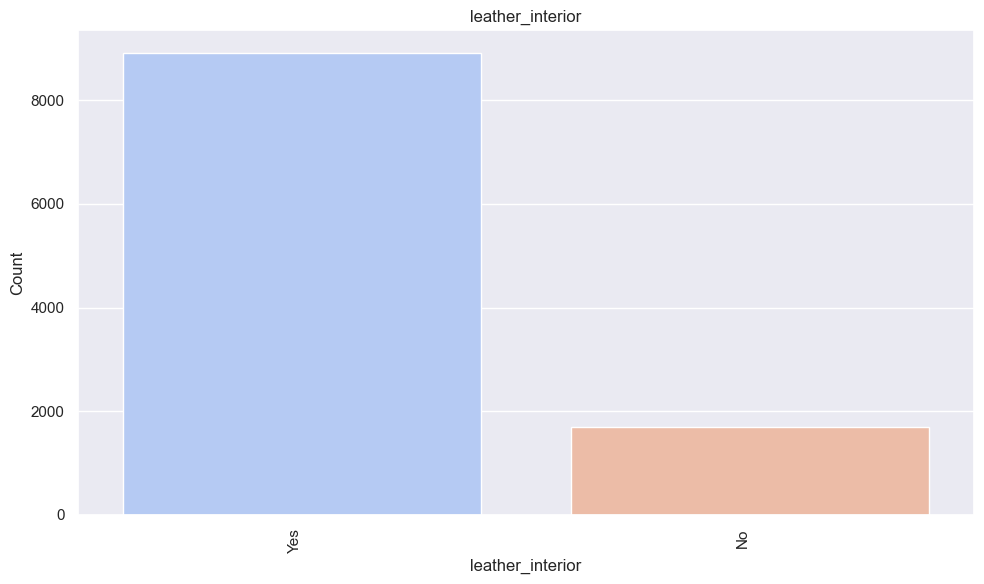

In [269]:
columns = ['color', 'drive_wheels', 'gear_box_type', 'fuel_type', 'wheel', 'leather_interior']
palette = 'coolwarm'

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.set(style="darkgrid")

    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette=palette)

    plt.xticks(rotation=90, ha="right")
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Some of the popular features chosen are the modern white color, front-wheel drive system for the road, easy automatic transmission, common fuel, left-hand steering as standard, and leather interior to convey a luxurious impression.

### <b><span style='color:#85BB65'>|</span> Data Encoding</b>

In [270]:
df_object = df.select_dtypes(include=object)
df_object

,manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,doors,wheel,color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,4,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,4,Left wheel,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,4,Left wheel,Silver
5,HYUNDAI,Santa FE,Jeep,Yes,Diesel,Automatic,Front,4,Left wheel,White
...,...,...,...,...,...,...,...,...,...,...
19231,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,4,Left wheel,Grey
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,4,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,4,Left wheel,Grey
19235,CHEVROLET,Captiva,Jeep,Yes,Diesel,Automatic,Front,4,Left wheel,Black


In [271]:
#displays the number of uniques per column
for column in df_object.columns:
    print(f"{column} number of unique are: {df_object[column].nunique()}")

manufacturer number of unique are: 43
model number of unique are: 615
category number of unique are: 10
leather_interior number of unique are: 2
fuel_type number of unique are: 6
gear_box_type number of unique are: 4
drive_wheels number of unique are: 3
doors number of unique are: 3
wheel number of unique are: 2
color number of unique are: 16


In [272]:
#recode the two categorical non numeric variable
df_enc = pd.get_dummies(
    df,
    columns=['leather_interior', 'wheel'],
    drop_first=True #drop first column
)

df_enc = df_enc.rename(
    columns={'leather_interior_Yes': 'leather_interior', 'wheel_Right-hand drive':'wheel_right_hand'}
)
df_enc = df_enc.set_index('id')
df_enc.head()

,price,levy,manufacturer,model,category,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,color,airbags,car_age,leather_interior,wheel_right_hand
id,,,,,,,,,,,,,,,,,
45654403,13328.0,1399.0,LEXUS,RX 450,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Silver,12.0,14.0,True,False
44731507,16621.0,1018.0,CHEVROLET,Equinox,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Black,8.0,13.0,False,False
45769185,3607.0,862.0,FORD,Escape,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,White,0.0,13.0,True,False
45809263,11726.0,446.0,HONDA,FIT,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Silver,4.0,10.0,True,False
45802912,39493.0,891.0,HYUNDAI,Santa FE,Jeep,Diesel,2.0,160931.0,4.0,Automatic,Front,4,White,4.0,8.0,True,False


In [273]:
#manufacturer colomn encode
df_manufacturer = df_enc.groupby('manufacturer')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.manufacturer = df_enc.manufacturer.map(df_manufacturer)

#fuel type colomn encode
df_fuel_type = df_enc.groupby('fuel_type')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.fuel_type = df_enc.fuel_type.map(df_fuel_type)

#gear box type colomn encode
df_gear_box_type = df_enc.groupby('gear_box_type')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.gear_box_type = df_enc.gear_box_type.map(df_gear_box_type)

#drive_wheels colomn encode
df_drive_wheels = df_enc.groupby('drive_wheels')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.drive_wheels = df_enc.drive_wheels.map(df_drive_wheels)

#doors colomn encode
df_doors = df_enc.groupby('doors')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.doors = df_enc.doors.map(df_doors)

#color colomn encode
df_color = df_enc.groupby('color')['price'].mean().sort_values(
    ascending=False).to_dict()
df_enc.color = df_enc.color.map(df_color)

In [274]:
df_enc.drop(['model', 'category'], axis=1, inplace=True)

In [275]:
df_enc_corr = df_enc.corr()
df_enc_corr.price

price               1.000000
levy               -0.036412
manufacturer        0.419726
fuel_type           0.364538
engine_volume      -0.098657
mileage            -0.265202
cylinders          -0.137875
gear_box_type       0.173797
drive_wheels        0.135796
doors               0.027022
color               0.085023
airbags            -0.227987
car_age            -0.238428
leather_interior   -0.035185
wheel_right_hand   -0.063925
Name: price, dtype: float64

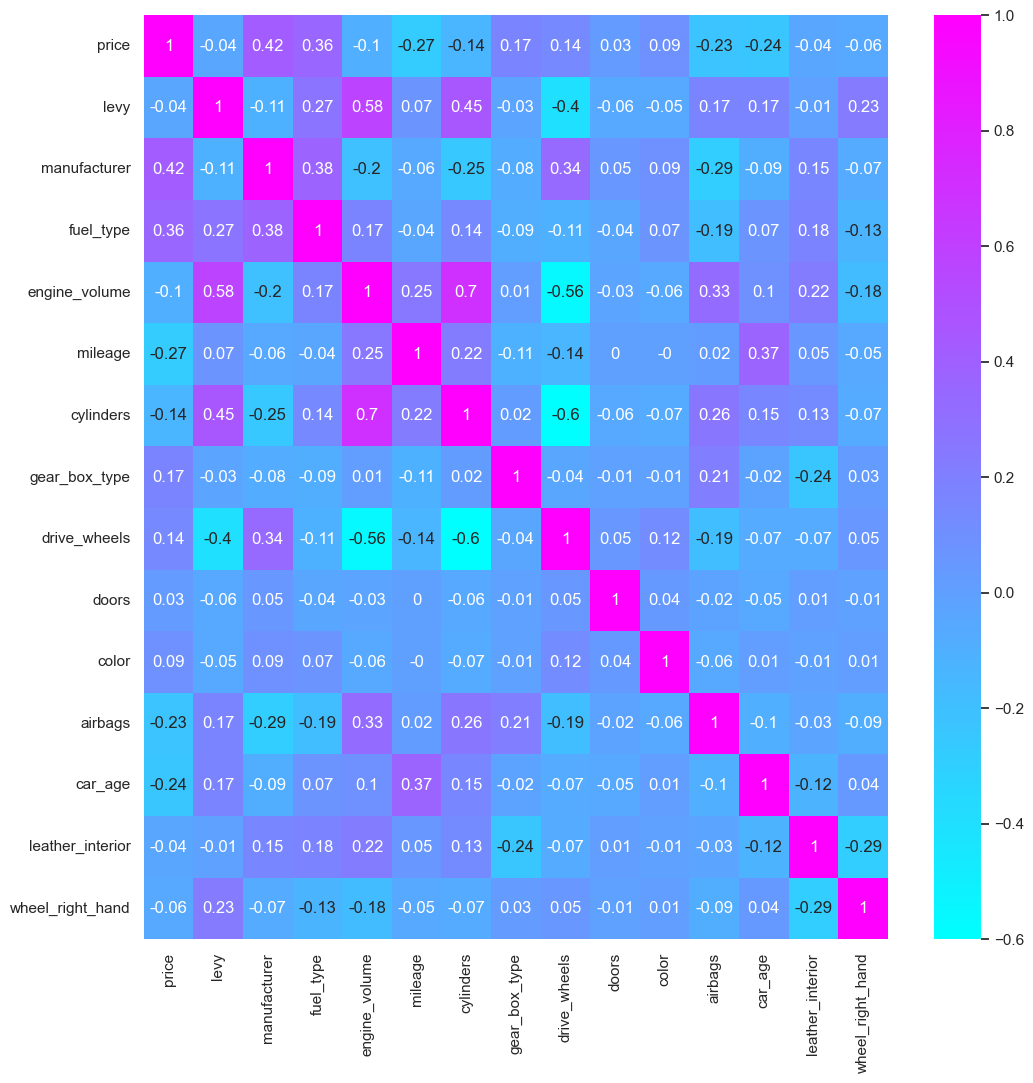

In [276]:
f, ax = plt.subplots(1, 1, figsize=(12, 12))
ax = sns.heatmap(df_enc_corr.round(2), annot=True, cmap="cool")

The high correlation value between "cylinder" and "engine volume" of 0.66 indicates a strong and positive relationship. This can happen because larger, high-performance engines tend to have more cylinders. High-end vehicles also usually have a higher number of cylinders.

In [277]:
#drop column with correlation below 0.5
df_enc.drop(['wheel_right_hand', 'drive_wheels'], axis=1, inplace=True)

In [278]:
df_enc

,price,levy,manufacturer,fuel_type,engine_volume,mileage,cylinders,gear_box_type,doors,color,airbags,car_age,leather_interior
id,,,,,,,,,,,,,
45654403,13328.0,1399.0,8460.138889,8981.704876,3.5,186005.0,6.0,14245.520277,15018.063332,15406.123223,12.0,14.0,True
44731507,16621.0,1018.0,13657.732240,14302.207731,3.0,192000.0,6.0,20968.818262,15018.063332,14015.819993,8.0,13.0,False
45769185,3607.0,862.0,11168.104096,8981.704876,2.5,168966.0,4.0,14245.520277,15018.063332,15817.592993,0.0,13.0,True
45809263,11726.0,446.0,13702.574561,14302.207731,1.3,91901.0,4.0,14245.520277,15018.063332,15406.123223,4.0,10.0,True
45802912,39493.0,891.0,20146.947971,21450.575935,2.0,160931.0,4.0,14245.520277,15018.063332,15817.592993,4.0,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45772306,5802.0,1055.0,10495.418689,21450.575935,3.5,107800.0,6.0,14245.520277,15018.063332,15554.524590,12.0,11.0,True
45778856,15681.0,831.0,20146.947971,14302.207731,2.4,161600.0,4.0,20968.818262,15018.063332,12953.320652,8.0,13.0,True
45804997,26108.0,836.0,20146.947971,21450.575935,2.0,116365.0,4.0,14245.520277,15018.063332,15554.524590,4.0,14.0,True


In [279]:
df_enc.describe()

,price,levy,manufacturer,fuel_type,engine_volume,mileage,cylinders,gear_box_type,doors,color,airbags,car_age
count,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000,10606.000000
mean,14995.125306,806.550632,14995.125306,14995.125306,2.133396,127979.569112,4.279841,14995.125306,14995.125306,14995.125306,6.967754,10.880445
std,11973.596464,268.328606,5025.625147,4364.832682,0.581670,73758.186108,0.743948,2080.973159,323.550869,1018.028575,4.351711,2.696644
min,1.000000,247.000000,150.000000,8981.704876,0.800000,13.000000,1.000000,14120.208000,12650.457746,8286.600000,0.000000,4.000000
25%,4234.000000,639.000000,11168.104096,14302.207731,1.700000,72000.000000,4.000000,14245.520277,15018.063332,14015.819993,4.000000,9.000000
50%,13799.000000,769.000000,13657.732240,14302.207731,2.000000,118400.000000,4.000000,14245.520277,15018.063332,15406.123223,6.000000,11.000000
75%,21796.000000,966.000000,20146.947971,21450.575935,2.500000,170000.000000,4.000000,14245.520277,15018.063332,15817.592993,12.000000,13.000000
max,47120.000000,1681.000000,46101.000000,21450.575935,3.500000,362868.000000,16.000000,20968.818262,18459.518519,18745.766667,16.000000,24.000000


### <b><span style='color:#85BB65'>|</span> Data Scaling</b>

Note: Because the results after data encoding show almost the same prediction results both before and after scaling, the scaling option is optional

In [280]:
#Perform scaling (if necessary) --> You can experiment using various kinds of scaling
df_enc_scaler= df_enc.copy()
#Standard Scaler uses data_stdr

#for train model
#x= df_enc_scaler.drop(columns=['price'], axis=1)
#y = df_enc_scaler['price']

#Test train split with several methods (Random, K-Fold split) --> Random can test data percentage changes
#0.2, 0.25, 0.3, 0.33

#### StandarScaler (Skipped)

In [281]:
std_scaler = StandardScaler()

# Using fit_transform to perform standard scaling on the DataFrame
scaled_df_ss = std_scaler.fit_transform(df_enc_scaler)

# Converts the scaling results back to a DataFrame
stdr_data = pd.DataFrame(scaled_df_ss, columns=df_enc_scaler.columns)

print("\nDataFrame Before Standard Scaling:")
print(stdr_data)


DataFrame Before Standard Scaling:
          price      levy  manufacturer  fuel_type  engine_volume   mileage  \
0     -0.139240  2.208029     -1.300394  -1.377763       2.349561  0.786735   
1      0.135795  0.788061     -0.266127  -0.158758       1.489926  0.868018   
2     -0.951148  0.206657     -0.761537  -1.377763       0.630291  0.555713   
3     -0.273041 -1.343754     -0.257204  -0.158758      -1.432833 -0.489170   
4      2.046088  0.314739      1.025159   1.479038      -0.229344  0.446771   
...         ...       ...           ...        ...            ...       ...   
10601 -0.767819  0.925958     -0.895395   1.479038       2.349561 -0.273604   
10602  0.057285  0.091122      1.025159  -0.158758       0.458364  0.455841   
10603  0.928159  0.109756      1.025159   1.479038      -0.229344 -0.157476   
10604 -0.807158  1.794337     -0.266127   1.479038      -0.229344 -1.040226   
10605 -1.213153 -0.199580      1.025159  -1.377763       0.458364  0.799182   

       cylinder

#### MinMax Scaler (Skipped)

In [282]:
minmax_scaler = MinMaxScaler()

#Using fit_transform to perform standard scaling on the DataFrame
scaled_df_mm = minmax_scaler.fit_transform(df_enc_scaler)

#Converts the scaling results back to a DataFrame
minmax_data = pd.DataFrame(scaled_df_mm, columns=df_enc_scaler.columns)

print("\nDataFrame After Standard Scaling:")
print(minmax_data)


DataFrame After Standard Scaling:
          price      levy  manufacturer  fuel_type  engine_volume   mileage  \
0      0.282837  0.803347      0.180848   0.000000       1.000000  0.512579   
1      0.352724  0.537657      0.293959   0.426703       0.814815  0.529101   
2      0.076530  0.428870      0.239779   0.000000       0.629630  0.465621   
3      0.248838  0.138773      0.294935   0.426703       0.185185  0.253236   
4      0.838133  0.449093      0.435180   1.000000       0.444444  0.443477   
...         ...       ...           ...        ...            ...       ...   
10601  0.123114  0.563459      0.225140   1.000000       1.000000  0.297053   
10602  0.332774  0.407252      0.435180   0.426703       0.592593  0.445321   
10603  0.554065  0.410739      0.435180   1.000000       0.444444  0.320657   
10604  0.113118  0.725941      0.293959   1.000000       0.444444  0.141227   
10605  0.009954  0.352859      0.435180   0.000000       0.592593  0.515109   

       cylinders

### <b><span style='color:#85BB65'>|</span> Apply Model With Hyperparameter Tuning</b>

In [283]:
x = df_enc.drop(["price"], axis=1)
y = df_enc[["price"]]

# Split first then scale
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

#scaler_x = StandardScaler()
#x_train_scaled = scaler_x.fit_transform(x_train)
#x_test_scaled = scaler_x.transform(x_test)

Linear Regression

In [284]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))

print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

MSE Train:  89040824.74195829
MAE Train:  7498.3755457865545
R2 Train:  0.38106395590264963
MSE Test:  86561559.65134883
MAE Test:  7412.985580448003
R2 Test:  0.3874381920652763


In [285]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,6899.0,16211.02
1,21395.0,20064.44
2,29965.0,14311.89
3,5018.0,13672.13
4,11290.0,13225.07
...,...,...
2117,12544.0,8606.15
2118,11290.0,22556.97
2119,12541.0,8754.64
2120,11133.0,5519.27


Lasso Regression

In [286]:
from sklearn.linear_model import Lasso

param = {"alpha": np.arange(0,10)}
scoring = {'mae': 'neg_mean_absolute_error', 
           'mse': 'neg_mean_squared_error', 
           'r2': 'r2'}

lasso_gs = GridSearchCV(Lasso(), # model
                      param_grid = param, # hyperparameters
                      scoring= 'neg_mean_squared_error', # metric for scoring
                      cv=10,
                      n_jobs=-1, error_score='raise', verbose=3, refit=True)

lasso_gs.fit(x_train, y_train)
print(lasso_gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'alpha': 2}


In [287]:
lasso_reg = Lasso(alpha=2)
lasso_reg.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = lasso_reg.predict(x_train)
y_train_pred = y_train_pred.flatten()

# Prediksi pada data uji
y_test_pred = lasso_reg.predict(x_test)
y_test_pred = y_test_pred.flatten()

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  89040950.71694218
MAE Train:  7498.379347335862
R2 Train:  0.3810630802317604
MSE Test:  86564391.63487047
MAE Test:  7413.098943702176
R2 Test:  0.3874181512416932


In [288]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,6899.0,16199.04
1,21395.0,20066.57
2,29965.0,14277.63
3,5018.0,13678.74
4,11290.0,13211.29
...,...,...
2117,12544.0,8592.20
2118,11290.0,22563.93
2119,12541.0,8743.64
2120,11133.0,5505.88


Ridge Regression

In [289]:
from sklearn.linear_model import Ridge

scoring = {'mae': 'neg_mean_absolute_error', 
           'mse': 'neg_mean_squared_error', 
           'r2': 'r2'}

param = {"alpha": np.arange(0,10)}

ridge_gs = GridSearchCV(Ridge(), # model
                      param_grid = param, # hyperparameters
                      scoring='neg_mean_squared_error', # metric for scoring
                      cv=10,
                      n_jobs=-1, error_score='raise', verbose=3, refit=True)

ridge_gs.fit(x_train, y_train)
print(ridge_gs.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'alpha': 9}


In [290]:
ridge_reg = Ridge(alpha=9)
ridge_reg.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = ridge_reg.predict(x_train)
y_train_pred = y_train_pred.flatten()

# Prediksi pada data uji
y_test_pred = ridge_reg.predict(x_test)
y_test_pred = y_test_pred.flatten()

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  89041036.5670299
MAE Train:  7498.608788968889
R2 Train:  0.38106248347500493
MSE Test:  86564590.19151755
MAE Test:  7413.41488334747
R2 Test:  0.3874167461350939


In [291]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,6899.0,16205.45
1,21395.0,20069.05
2,29965.0,14284.55
3,5018.0,13682.84
4,11290.0,13197.27
...,...,...
2117,12544.0,8578.43
2118,11290.0,22564.23
2119,12541.0,8732.43
2120,11133.0,5508.04


Random Forest Regression

In [292]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'max_depth': np.arange(1, 10),
    'max_features': np.arange(1, 10),
    'n_estimators' : [50, 100],
    'min_samples_split': np.arange(1, 5)
}

# Adjust the shape of y_train
y_train_array = y_train.values.ravel()

randFor_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, verbose=3)
randFor_grid.fit(x_train, y_train_array)  # Use adjusted y_train

print(randFor_grid.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, min_samples

In [293]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth = 9, max_features = 7, min_samples_split = 2, n_estimators = 50)
rf_reg.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = rf_reg.predict(x_train)
y_train_pred = y_train_pred.flatten()

# Prediksi pada data uji
y_test_pred = rf_reg.predict(x_test)
y_test_pred = y_test_pred.flatten()

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  29849946.399009254
MAE Train:  3924.541490874483
R2 Train:  0.7925085735193695
MSE Test:  36749808.32966401
MAE Test:  4245.6025419651205
R2 Test:  0.7399361896626504


In [294]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,6899.0,7165.82
1,21395.0,20321.48
2,29965.0,24004.27
3,5018.0,4661.38
4,11290.0,16282.17
...,...,...
2117,12544.0,15874.72
2118,11290.0,11254.97
2119,12541.0,13356.84
2120,11133.0,5983.82


Gradient Boosting Regression

In [295]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = gb_reg.predict(x_train)

# Prediksi pada data uji
y_test_pred = gb_reg.predict(x_test)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  44434501.75823602
MAE Train:  4872.969026741791
R2 Train:  0.6911291554252679
MSE Test:  44208861.47051373
MAE Test:  4822.049563201407
R2 Test:  0.687151430517326


In [296]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,6899.0,9991.91
1,21395.0,19283.59
2,29965.0,23535.39
3,5018.0,6238.68
4,11290.0,15981.10
...,...,...
2117,12544.0,12684.01
2118,11290.0,14753.21
2119,12541.0,14421.64
2120,11133.0,5776.92


XGBoost Regressor

In [297]:
import xgboost as xgb

params = {'max_depth': np.arange(1,10),
             'min_child_weight': np.arange(1,10)
            }

gbm = GridSearchCV(xgb.XGBRegressor( ),
                    param_grid = params,
                    scoring = "neg_mean_squared_error",
                    cv = 5,
                    verbose = True
)

gbm.fit(x_train,y_train)
print(gbm.cv_results_)
print ("Best parameters %s" %gbm.best_params_)
print ("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'mean_fit_time': array([0.23021793, 0.15521255, 0.14981079, 0.11440821, 0.09400754,
       0.11161094, 0.11500897, 0.11980934, 0.10740752, 0.16581178,
       0.13541012, 0.13221107, 0.11820998, 0.15041246, 0.13421092,
       0.13481011, 0.14161019, 0.12160997, 0.17421308, 0.15741234,
       0.15441179, 0.15301266, 0.14301143, 0.14101138, 0.13820977,
       0.15481186, 0.1540122 , 0.17761345, 0.17101269, 0.18461361,
       0.17821417, 0.17781334, 0.26482058, 0.24501987, 0.23041906,
       0.22101822, 0.30742183, 0.21581688, 0.26981735, 0.20661616,
       0.1946147 , 0.20661497, 0.21261625, 0.22201548, 0.20301433,
       0.26002059, 0.25962033, 0.26561933, 0.24821997, 0.25301943,
       0.26961985, 0.25781865, 0.29642353, 0.2426188 , 0.33042536,
       0.30602317, 0.33282738, 0.3094223 , 0.3270236 , 0.32602592,
       0.26701951, 0.26842065, 0.25301986, 0.43323278, 0.39242821,
       0.36842837, 0.39123054, 0.41863155, 0.3360

In [298]:
import xgboost as xgb

xgb_reg = gbm = xgb.XGBRegressor(max_depth = 8, min_child_weight = 3)
xgb_reg.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = xgb_reg.predict(x_train)

# Prediksi pada data uji
y_test_pred = xgb_reg.predict(x_test)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

MSE Train:  5052043.384955803
MAE Train:  1448.7807099283978
R2 Train:  0.9648824934365274
MSE Test:  30790667.766530734
MAE Test:  3372.898911906682
R2 Test:  0.7821066626970188


LightGBM Regression

In [299]:
import lightgbm as lgb 

lgbm = gbm = lgb.LGBMRegressor()
lgbm.fit(x_train, y_train)

# Prediksi pada data latih
y_train_pred = lgbm.predict(x_train)

# Prediksi pada data uji
y_test_pred = lgbm.predict(x_test)

# Evaluasi pada data latih
print("MSE Train: ", mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", r2_score(y_train, y_train_pred))

# Evaluasi pada data uji
print("MSE Test: ", mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", r2_score(y_test, y_test_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 8484, number of used features: 12
[LightGBM] [Info] Start training from score 14969.360561
MSE Train:  24313948.932225738
MAE Train:  3457.1405309102515
R2 Train:  0.8309901170377926
MSE Test:  32081468.10062574
MAE Test:  3847.753303595052
R2 Test:  0.7729721809533818


### <b><span style='color:#85BB65'>|</span> Choose Best Model</b>

In [300]:
models = {'Random Forest Regressor': rf_reg, 'Gradient Boosting Regressor': gb_reg, 'XGBoost Regressor': xgb_reg, 'LightGBM Regressor': lgbm}

results = {'Model Name': [], 'MSE Train': [], 'MAE Train': [], 'R2 Train': [], 'MSE Test': [], 'MAE Test': [], 'R2 Test': []}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)

    results['Model Name'].append(model_name)
    results['MSE Train'].append(mse_train)
    results['MAE Train'].append(mae_train)
    results['R2 Train'].append(r2_score_train)
    results['MSE Test'].append(mse_test)
    results['MAE Test'].append(mae_test)
    results['R2 Test'].append(r2_score_test)

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 8484, number of used features: 12
[LightGBM] [Info] Start training from score 14969.360561


,Model Name,MSE Train,MAE Train,R2 Train,MSE Test,MAE Test,R2 Test
0,Random Forest Regressor,2.951714e+07,3887.054621,0.794822,3.590701e+07,4200.820264,0.745900
1,Gradient Boosting Regressor,4.443450e+07,4872.969027,0.691129,4.420652e+07,4821.712997,0.687168
2,XGBoost Regressor,5.052043e+06,1448.780710,0.964882,3.079067e+07,3372.898912,0.782107
3,LightGBM Regressor,2.431395e+07,3457.140531,0.830990,3.208147e+07,3847.753304,0.772972


In [301]:
grp_ = results_df.drop(['MSE Train', 'MAE Train', 'MSE Test', 'MAE Test'], axis=1).set_index('Model Name')

In [302]:
grp_index = np.arange(len(grp_.index))  # Menambahkan index agar bisa dikendalikan lebar bar-nya
bar_width = 0.35  # Lebar masing-masing bar

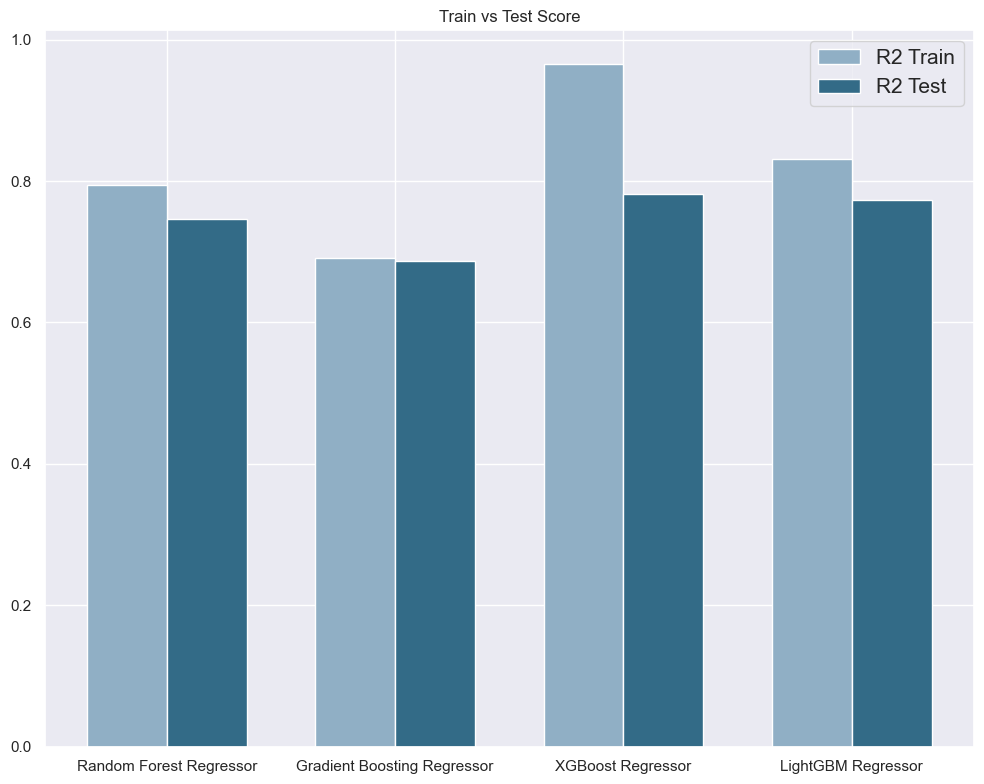

In [303]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(10, 8))

# Menambahkan bar R2 Train
ax.bar(grp_index - bar_width/2, grp_['R2 Train'], bar_width, label='R2 Train', color='#90AFC5')

# Menambahkan bar R2 Test
ax.bar(grp_index + bar_width/2, grp_['R2 Test'], bar_width, label='R2 Test', color='#336B87')

# Menambahkan label dan legend
ax.set_title('Train vs Test Score')
ax.set_xticks(grp_index)
ax.set_xticklabels(grp_.index)
ax.legend(fontsize=15)
plt.tight_layout()
plt.show()


Insights:

  Choosing the LightGBM Regressor model because from the evaluation results provided, this model shows better performance compared to other models, both on training data and test data and does not show overfitting. LightGBM Regressor provides lower MSE and higher R^2, indicating that the model is able to fit the data better and produce more accurate predictions.

In [304]:
# df.to_csv('out.csv', index=True)

### <b><span style='color:#85BB65'>|</span> Save Model</b>

In [307]:
import pickle
lgbr_reg_model = lgb.LGBMRegressor().fit(x_train.values, y_train.values)
pickle.dump(lgbr_reg_model, open("LGBRmodel.pkl","wb"))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 8484, number of used features: 12
[LightGBM] [Info] Start training from score 14969.360561
